In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
data = pd.read_csv("C:\\Users\\bhimr\\OneDrive\\Documents\\PCA\\wine.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
#Dropping Duplicates Rows and Columns
data = data.drop_duplicates()

In [5]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


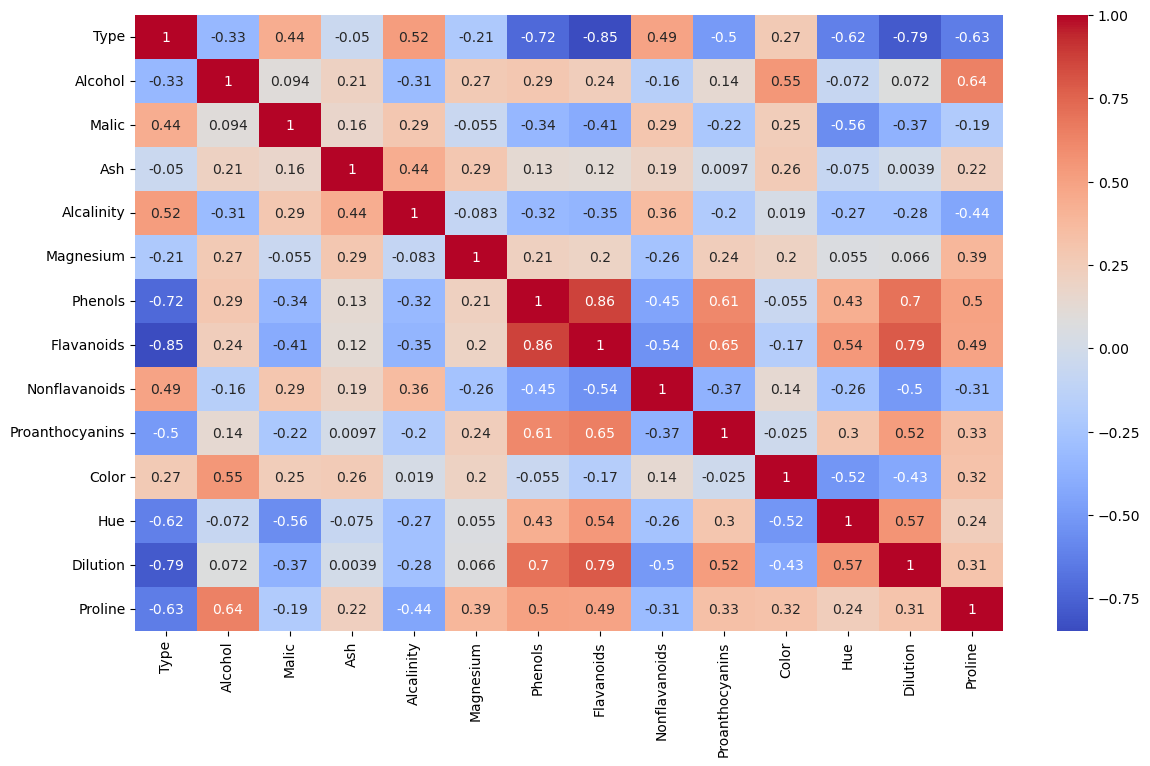

In [8]:
#Correlation Matrix with plot diagram
corr_matrix = data.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [11]:
#Standardizing the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [12]:
#Applying PCA in standardized dataset
from sklearn.decomposition import PCA

pca = PCA()
data_pca = pca.fit_transform(data_scaled)

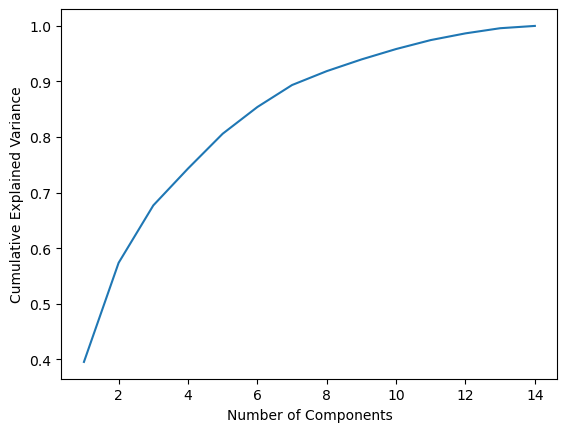

In [13]:
#Vriance Graph
explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [15]:
#Applying the K means
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_scaled)
labels = kmeans.labels_

C:\Users\bhimr\OneDrive\Documents\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
#Applying sihouette
silhouette = silhouette_score(df_scaled, labels)
db_index = davies_bouldin_score(df_scaled, labels)
print(f"Silhouette Score: {silhouette}")
print(f"Davies–Bouldin Index: {db_index}")


Silhouette Score: 0.30648398324833453
Davies–Bouldin Index: 1.315707552261773


In [20]:
pca = PCA(n_components=2)
df_pca_2 = pca.fit_transform(data_scaled)
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(df_pca_2)

labels_pca = kmeans_pca.labels_

C:\Users\bhimr\OneDrive\Documents\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters
kmeans.fit(data_scaled)

# Get cluster labels
labels = kmeans.labels_

C:\Users\bhimr\OneDrive\Documents\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


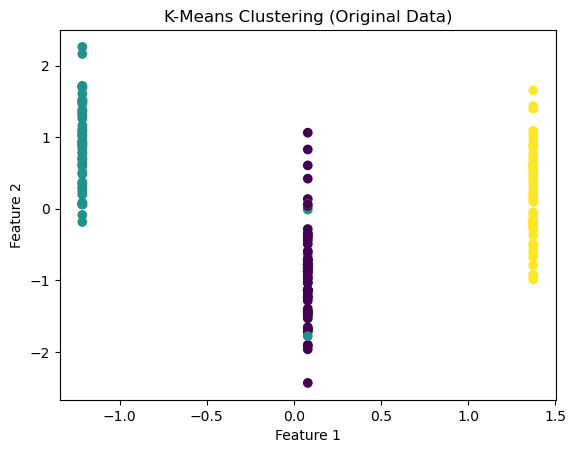

In [22]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering (Original Data)')
plt.show()

In [23]:
silhouette_pca = silhouette_score(df_pca_2, labels_pca)
db_index_pca = davies_bouldin_score(df_pca_2, labels_pca)

print(f"Silhouette Score (PCA): {silhouette_pca}")
print(f"Davies-Bouldin Index (PCA): {db_index_pca}")

Silhouette Score (PCA): 0.6024415520362845
Davies-Bouldin Index (PCA): 0.5397078562575711


In [ ]:
#Performance silhouette = 0.602
#Performance Davies-